<a href="https://colab.research.google.com/github/gikirima/TugasML_Kmeans/blob/main/K_means_custom_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Euclidean Distance**

kmeans merupakan suatu algoritma klustering yang memanfaatkan means dari masing-masing kluster untuk menentukan centroid, yang juga berfungsi untuk meminimalkan jarak antara titik centroid dan data pada kluster. ini membuat euclidean distance menjadi pilihan yang harus dalam algoritma kmeans.
<br> Pada intinya, Euclidean Distance digunakan karena menggunakan algoritma kmeans, bukan sebaliknya.

# Load data

In [205]:
import pandas as pd

df = pd.read_csv('heart_data.csv')

df.head()

,age,cholesterol,max_hr,st_depression
0,63,233,150,2.3
1,67,286,108,1.5
2,67,229,129,2.6
3,37,250,187,3.5
4,41,204,172,1.4


# Exploratory Data Analysis

In [206]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30 non-null     int64  
 1   cholesterol    30 non-null     int64  
 2   max_hr         30 non-null     int64  
 3   st_depression  30 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


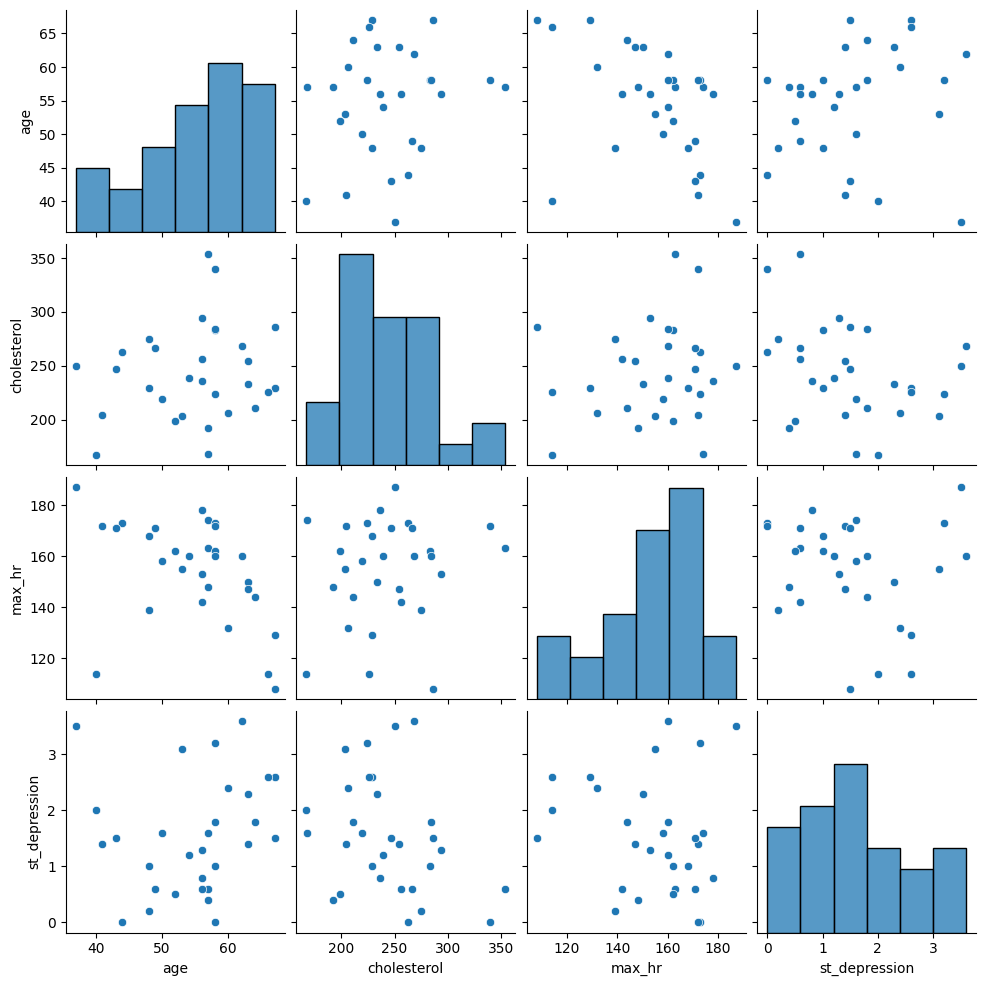

In [207]:
# visualisasi distribusi masing masing kolom
import seaborn as sns

sns.pairplot(df)

<Axes: >

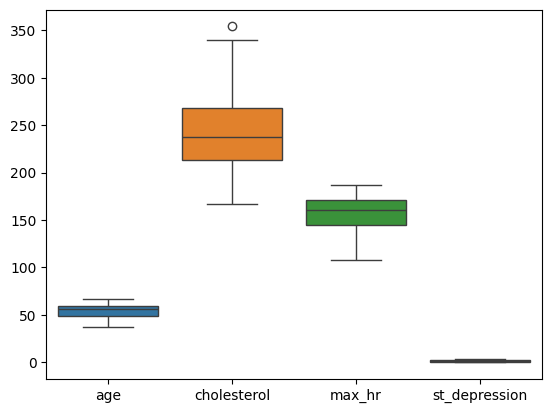

In [208]:
# visualisasi boxplot dari masing masing kolom
sns.boxplot(data=df)

In [209]:
# Hitung Q1, Q3, dan IQR
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outlier
outliers = df[(df['cholesterol'] < (Q1 - 1.5 * IQR)) | (df['cholesterol'] > (Q3 + 1.5 * IQR))]

print("Data kolesterol yang keluar dari boxplot (outliers):")
outliers


Data kolesterol yang keluar dari boxplot (outliers):


,age,cholesterol,max_hr,st_depression
7,57,354,163,0.6


In [210]:
# hapus data outlier
df = df[(df['cholesterol'] >= (Q1 - 1.5 * IQR)) & (df['cholesterol'] <= (Q3 + 1.5 * IQR))]
df

,age,cholesterol,max_hr,st_depression
0,63,233,150,2.3
1,67,286,108,1.5
2,67,229,129,2.6
3,37,250,187,3.5
4,41,204,172,1.4
5,56,236,178,0.8
6,62,268,160,3.6
8,63,254,147,1.4
9,53,203,155,3.1
10,57,192,148,0.4


In [211]:
# cari duplikat
df.duplicated().sum()

0

# Preprocessing

In [212]:
# standarisasi data dengan standarscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.02595807, -0.17374726, -0.21861628,  0.72850083],
       [ 1.51773962,  1.20279675, -2.33190697, -0.06872649],
       [ 1.51773962, -0.27763737, -1.27526163,  1.02746108],
       [-2.17062203,  0.26778572,  1.64309219,  1.92434181],
       [-1.67884047, -0.92695059,  0.88834551, -0.16837991],
       [ 0.16534035, -0.09582967,  1.19024418, -0.7663004 ],
       [ 0.90301268,  0.73529124,  0.28454817,  2.02399523],
       [ 1.02595807,  0.37167584, -0.36956561, -0.16837991],
       [-0.20349582, -0.95292311,  0.03296595,  1.52572815],
       [ 0.28828574, -1.23862093, -0.31924917, -1.16491406],
       [ 0.16534035,  1.41057698, -0.06766694, -0.26803332],
       [ 0.16534035,  0.4236209 , -0.62114784, -0.96560723],
       [-1.31000431,  0.6054286 ,  0.93866196, -1.56352772],
       [-0.3264412 , -1.05681323,  0.38518106, -1.06526065],
       [ 0.28828574, -1.86196161,  0.9889784 ,  0.03092692],
       [-0.81822276, -0.27763737,  0.68707973, -0.56699357],
       [-0.08055043, -0.

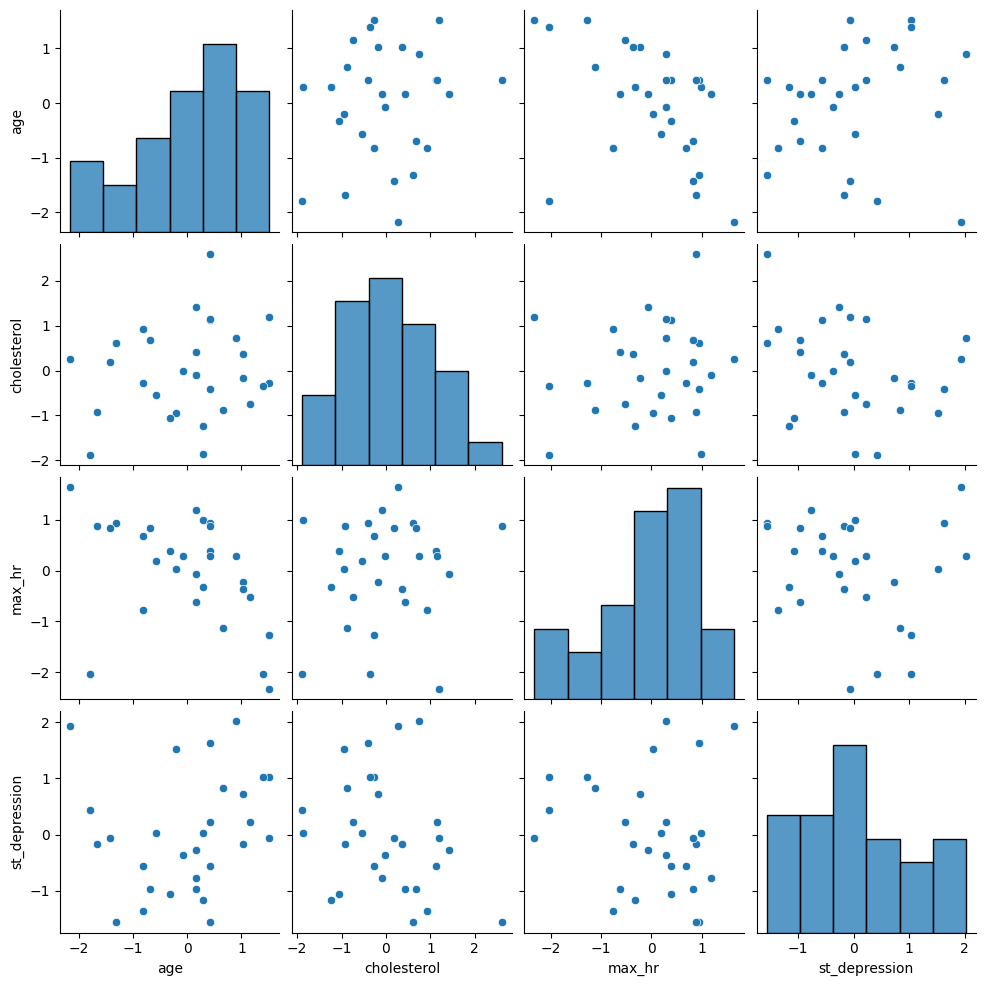

In [213]:
# visualisasi data setelah standarisasi
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))

# Terapkan Algoritma K-means metric euclidean distance (cukup dengan library dari sklearn)

In [214]:
# algoritma K-means, k=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1], dtype=int32)

# Visualisasi dengan PCA

In [215]:
# reduksi dimensi dengan PCA terhadap dataset asli untuk visualisasi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-1.10920979, -0.01520689],
       [-2.16619697,  1.90634744],
       [-2.23365487,  0.1166116 ],
       [ 1.59635816, -1.86407884],
       [ 1.49120142, -1.45431418],
       [ 0.97442917,  0.20097147],
       [-1.10002551, -0.06867659],
       [-0.71963708,  0.84742036],
       [-0.68720182, -1.54197053],
       [-0.10889457, -0.21353586],
       [ 0.23248587,  1.27485934],
       [-0.00557101,  0.93799714],
       [ 2.18250336,  0.52221451],
       [ 0.70753819, -0.4809565 ],
       [ 0.1009318 , -1.43704893],
       [ 1.13038819, -0.3798387 ],
       [ 0.38615952,  0.08922421],
       [ 0.75828667,  1.10591334],
       [ 1.50171508,  0.5693903 ],
       [-1.26932638, -0.11547507],
       [ 0.44899297,  1.24386989],
       [ 0.04669748,  0.89577092],
       [-0.42183817, -1.04074857],
       [-1.63857556, -0.62548579],
       [ 0.35313137, -0.68921151],
       [ 1.47410785,  2.77180829],
       [-2.6574366 ,  0.10914253],
       [ 1.47344594, -0.54591841],
       [-0.74080469,

Text(0, 0.5, 'Explained Variance Ratio')

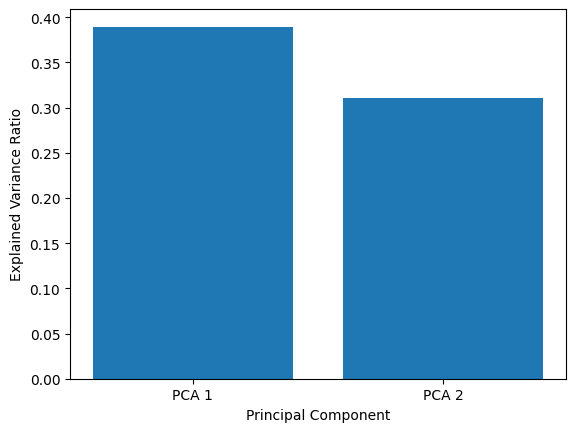

In [216]:
# bar graph penjelasan varians data dengan PCA
import matplotlib.pyplot as plt

plt.bar(['PCA 1','PCA 2'], pca.explained_variance_ratio_)
# plot bar X adalah PCA 1 dan PCA 2
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

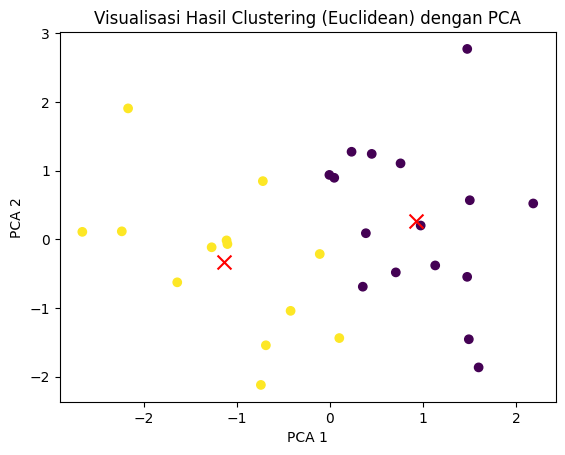

In [217]:
# visualisasikan df_PCA dengan warna hasil clustering
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Euclidean) dengan PCA')

# tampilkan centroid
centroids = kmeans.cluster_centers_
centroids = pca.transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **CityBlock (Manhattan Distance)**

karena kmeans menggunakan nilai means untuk meminimalkan distance antara centroid dan data kluster (dalam hal ini Euclidean Distance), Manhattan Distance sebenarnya bukan merupakan metrik yang cocok sebagai pengukur jarak.

In [218]:
import numpy as np

# Fungsi Manhattan Distance
def manhattan_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b))

# fungsi kustom k-means dengan metric manhattan distance
def custom_kmeans_manhattan(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0) # bisa pakai median untuk memperbarui titik
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_manhattan, centroids_manhattan = custom_kmeans_manhattan(df_scaled, n_clusters=2)


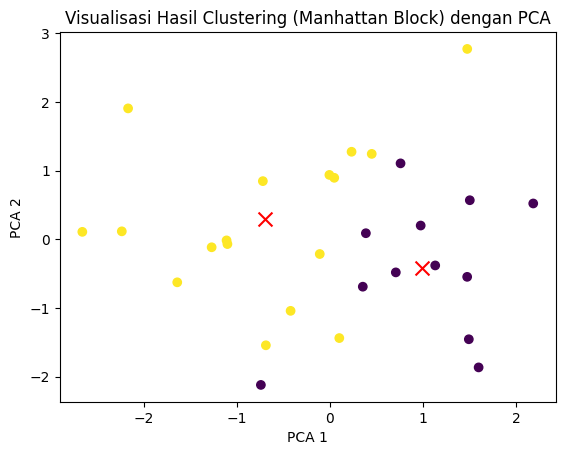

In [219]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_manhattan)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Manhattan Block) dengan PCA')

# tampilkan centroid
centroids_manhattan = pca.transform(centroids_manhattan)
plt.scatter(centroids_manhattan[:, 0], centroids_manhattan[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

sebagai alternatif, kita dapat menggunakan kmedian, yaitu optimasi sum of distance dengan menggunakan median

In [220]:
import numpy as np

# Fungsi Manhattan Distance
def manhattan_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b))

# fungsi kustom k-mediandengan metric manhattan distance
def custom_kmedian_manhattan(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan median
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.median(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_manhattan_med, centroids_manhattan_med = custom_kmedian_manhattan(df_scaled, n_clusters=2)


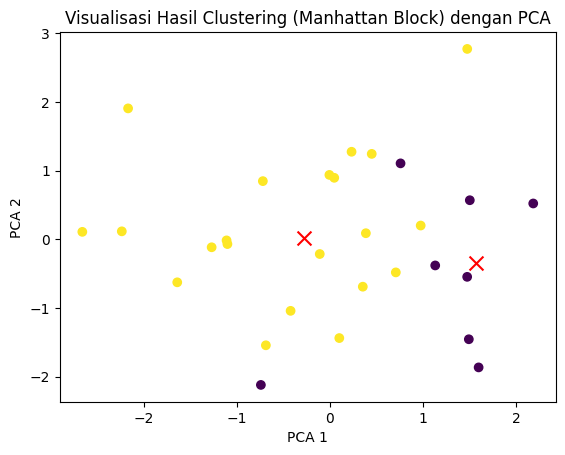

In [221]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_manhattan_med)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Manhattan Block) dengan PCA')

# tampilkan centroid
centroids_manhattan_med = pca.transform(centroids_manhattan_med)
plt.scatter(centroids_manhattan_med[:, 0], centroids_manhattan_med[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **Chebyshev Distance**

sama seperti Manhattan Distance, hasil perhitungan dari metrik Chebyshev Distance juga tidak bisa diminimumkan dengan mean.  

In [ ]:
# Fungsi Chebyshev Distance
def chebyshev_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.max(np.abs(a - b))

# fungsi kustom k-means dengan metric kustom chebyshev distance
def custom_kmeans_chebyshev(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan chebyshev distance
        labels = np.array([
            np.argmin([chebyshev_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_chebyshev, centroids_chebyshev = custom_kmeans_chebyshev(df_scaled, n_clusters=2)


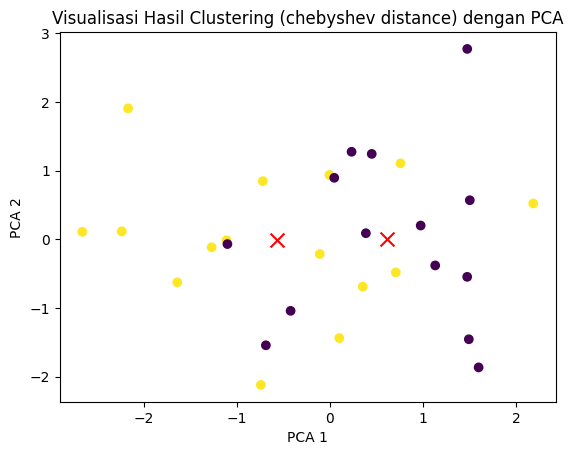

In [224]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_chebyshev)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (chebyshev distance) dengan PCA')

# tampilkan centroid
centroids_chebyshev = pca.transform(centroids_chebyshev)
plt.scatter(centroids_chebyshev[:, 0], centroids_chebyshev[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

namun, nilai Chebishev Distance dapat diminimumkan dengan menggunakan median, sama seperti Manhattan Distance. Ini karena rumus  Chebishev dan Manhattan Distance hanya berbeda dari cara aggregasi atau penggabungan hasil perhitungan jaraknya saja.

In [225]:
# fungsi kustom k-means dengan metric manhattan distance
def custom_kmedian_chebyshev(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([chebyshev_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.median(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_chebyshev_med, centroids_chebyshev_med = custom_kmedian_chebyshev(df_scaled, n_clusters=2)


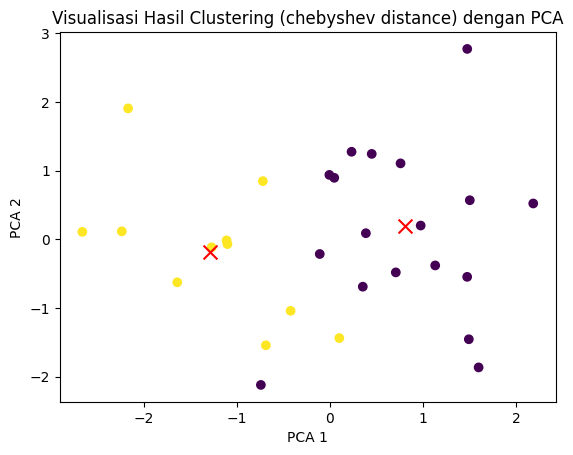

In [226]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_chebyshev_med)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (chebyshev distance) dengan PCA')

# tampilkan centroid
centroids_chebyshev_med = pca.transform(centroids_chebyshev_med)
plt.scatter(centroids_chebyshev_med[:, 0], centroids_chebyshev_med[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# perbandingan silhouette score antara k-means dan k-median
silhouette_chebyshev = silhouette_score(df_scaled, labels_chebyshev)
silhouette_chebyshev_med = silhouette_score(df_scaled, labels_chebyshev_med)
print(f'Silhouette Score K-Means (Chebyshev): {silhouette_chebyshev}')
print(f'Silhouette Score K-Median (Chebyshev): {silhouette_chebyshev_med}')

Silhouette Score K-Means (Chebyshev): 0.11771136223822787
Silhouette Score K-Median (Chebyshev): 0.24787758379888436


# **Jarak Minkowski**

Jarak minkowski adalah generalisasi dari rumus jarak di atas, sehingga rumus dari minkowski distance dapat mereproduksi rumus jarak.

In [ ]:
# Fungsi Minkowski distance
def minkowski_distance(a, b, p=2):
    """
    Menghitung Minkowski distance antara dua vektor a dan b.
    p = 1 untuk manhattan distance, 2 untuk euclidean distance, dan tak terhingga untuk chebyshev
    """
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b)**p)**(1/p)

# fungsi kustom k-means dengan metric Minkowski distance
def custom_kmeans_minkowski(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan Minkowski distance
        labels = np.array([
            np.argmin([minkowski_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_minkowski, centroids_minkowski = custom_kmeans_minkowski(df_scaled, n_clusters=2)


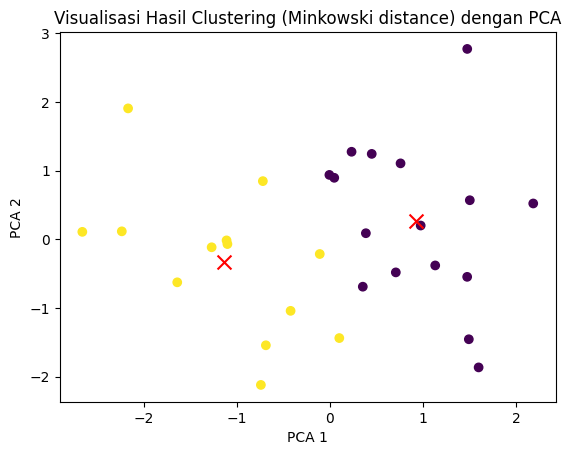

In [229]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_minkowski)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Minkowski distance) dengan PCA')

# tambahkan marker centroid
centroids_minkowski = pca.transform(centroids_minkowski)
plt.scatter(centroids_minkowski[:, 0], centroids_minkowski[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **Canberra Distance**

Canberra Distance tidak dapat menggunakan metode heuristik dalam mengoptimasi centroidnya. ini karena rumus Canberra Distance (penyebutnya) tergantung dari koordinat datum, sehingga nilainya juga akan dipengaruhi oleh nilai skala dari dataset. Ini menyebabkan nilai Canberra Distance tidak bisa mencapai minimum jika perhitungan dilakukan dengan pendekatan heuristik.

In [ ]:
# Fungsi Canberra Distance
def canberra_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b) / (np.abs(a) + np.abs(b) + 1e-10))  # tambahkan epsilon untuk menghindari pembagian dengan nol

# fungsi kustom k-means dengan metric Canberra distance
def custom_kmeans_canberra(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan Canberra distance
        labels = np.array([
            np.argmin([canberra_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_canberra, centroids_canberra = custom_kmeans_canberra(df_scaled, n_clusters=2)


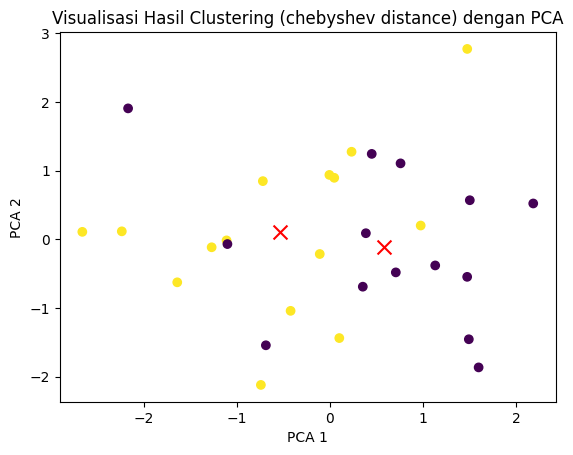

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_canberra)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Canberra distance) dengan PCA')

# tampilkan centroid
centroids_canberra = pca.transform(centroids_canberra)
plt.scatter(centroids_canberra[:, 0], centroids_canberra[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

Akan tetapi, kita dapat melakukan optimasi nilai Canberra Distance nya dengan pendekatan metaheuristik, seperti Genetic Algorithm (GA) 

In [232]:
! pip install deap

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [233]:
from deap import base, creator, tools, algorithms

def ga_optimize_centroid(cluster_points, n_features, ngen=30, pop_size=30):
    # Definisikan fungsi objektif
    def objective(individual):
        return (np.sum([canberra_distance(individual, x) for x in cluster_points]),)

    # Setup DEAP
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    toolbox = base.Toolbox()
    # Batas centroid, sesuaikan dengan data hasil scaling
    BOUNDS = [-3, 3]
    toolbox.register("attr_float", np.random.uniform, BOUNDS[0], BOUNDS[1])
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", objective)

    pop = toolbox.population(n=pop_size)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=ngen, verbose=False)
    best_ind = tools.selBest(pop, 1)[0]
    return np.array(best_ind)

def custom_kmeans_canberra_ga(X, n_clusters=2, max_iter=10, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        labels = np.array([
            np.argmin([canberra_distance(x, c) for c in centroids])
            for x in X
        ])
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = ga_optimize_centroid(cluster_points, n_features)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_canberra_ga, centroids_canberra_ga = custom_kmeans_canberra_ga(df_scaled, n_clusters=2)

/home/dsai_247056015/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/dsai_247056015/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


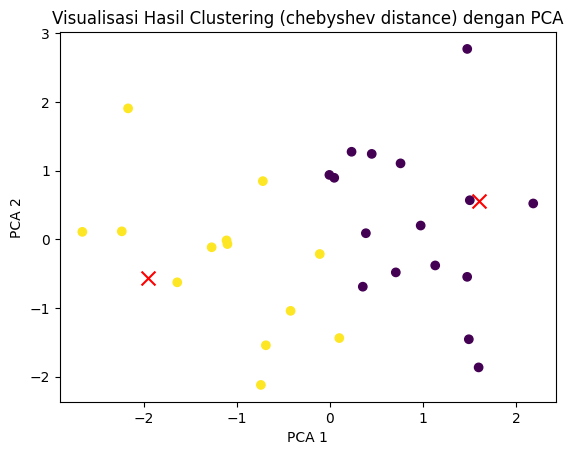

Silhouette Score (Canberra Distance with GA): 0.2513
Silhouette Score (Canberra Distance): 0.0764


In [234]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_canberra_ga)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (chebyshev distance) dengan PCA')

# tampilkan centroid
centroids_canberra_ga = pca.transform(centroids_canberra_ga)
plt.scatter(centroids_canberra_ga[:, 0], centroids_canberra_ga[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()


# evaluasi hasil clustering canberra distance
silhouette_avg_canberra_ga = silhouette_score(df_scaled, labels_canberra_ga)
print(f"Silhouette Score (Canberra Distance with GA): {silhouette_avg_canberra_ga:.4f}")

silhouette_avg_canberra = silhouette_score(df_scaled, labels_canberra)
print(f"Silhouette Score (Canberra Distance): {silhouette_avg_canberra:.4f}")

# **Bray-Curtis Distance**

Sama seperti Canberra, Bray-Curtis juga sulit dioptimasi dengan kmeans karena bilangan penyebutnya tergantung dari skala dataset.

In [ ]:
# Fungsi Bray-Curtis Distance
def bc_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b)) / np.sum(np.abs(a + b) + 1e-10)  # tambahkan epsilon untuk menghindari pembagian dengan nol

# fungsi kustom k-means dengan metric Bray-Curtis distance
def custom_kmeans_bc(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan Bray-Curtis distance
        labels = np.array([
            np.argmin([bc_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_bc, centroids_bc = custom_kmeans_bc(df_scaled, n_clusters=2)


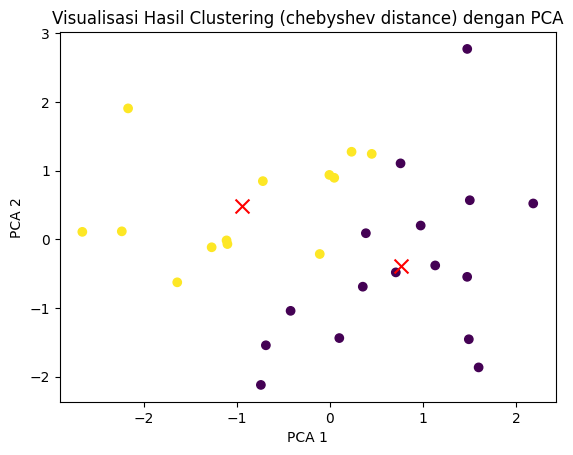

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_bc)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Bray-Curtis Distance) dengan PCA')

# tampilkan centroid
centroids_bc = pca.transform(centroids_bc)
plt.scatter(centroids_bc[:, 0], centroids_bc[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

Optimasi dengan GA

In [239]:
def custom_kmeans_canberra_ga(X, n_clusters=2, max_iter=10, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        labels = np.array([
            np.argmin([bc_distance(x, c) for c in centroids])
            for x in X
        ])
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = ga_optimize_centroid(cluster_points, n_features)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
        new_centroids = np.array(new_centroids)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_bc_ga, centroids_bc_ga = custom_kmeans_canberra_ga(df_scaled, n_clusters=2)

/home/dsai_247056015/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/dsai_247056015/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


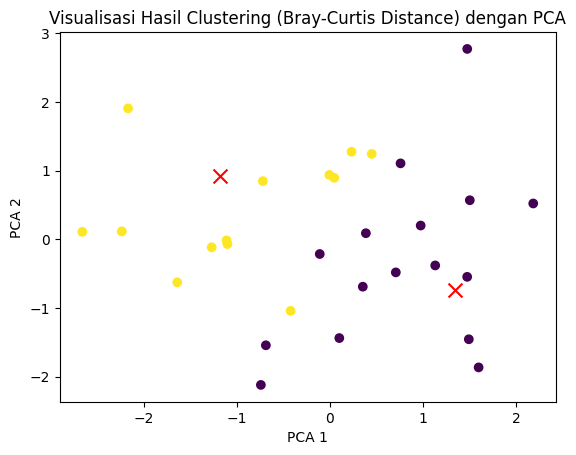

In [240]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_bc_ga)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Bray-Curtis Distance) dengan PCA')

# tampilkan centroid
centroids_bc_ga = pca.transform(centroids_bc_ga)
plt.scatter(centroids_bc_ga[:, 0], centroids_bc_ga[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

In [241]:
# evaluasi hasil clustering bray-curtis distance
silhouette_avg_bc_ga = silhouette_score(df_scaled, labels_bc_ga)
print(f"Silhouette Score (Bray-Curtis Distance with GA): {silhouette_avg_bc_ga:.4f}")
silhouette_avg_bc = silhouette_score(df_scaled, labels_bc)
print(f"Silhouette Score (Bray-Curtis Distance): {silhouette_avg_bc:.4f}")

Silhouette Score (Bray-Curtis Distance with GA): 0.2090
Silhouette Score (Bray-Curtis Distance): 0.1898


# **Divergensi Kullback Leibler**

divergensi kullback leibler harus menggunakan distribusi probabilitas (setiap baris harus berjumlah 1 dan semua nilai positif), jadi df_scaled tidak bisa digunakan. kita akan mencoba membagi data dalam setiap baris dengan total dari setiap baris. metrik ini biasanya membandingkan antara probabilitas real dengan probabilitas suatu data.

In [271]:
from scipy.special import softmax

# Konversi tiap row ke distribusi dengan softmax
distributions = np.apply_along_axis(softmax, 1, df_scaled)

# Tampilkan hasil untuk 5 baris pertama
softmax_df = pd.DataFrame(distributions, columns=df.columns)
softmax_df.head()

,age,cholesterol,max_hr,st_depression
0,0.428807,0.129192,0.123524,0.318477
1,0.511309,0.373169,0.010884,0.104638
2,0.543550,0.090265,0.033285,0.332900
3,0.008488,0.097231,0.384673,0.509608
4,0.048358,0.102568,0.630067,0.219006


In [272]:
# import kullback leibler divergence
from scipy.special import rel_entr
# fungsi untuk menghitung Kullback-Leibler Divergence
def kullback_leibler_divergence(p, q):
    return np.sum(rel_entr(p, q))

# fungsi kustom k-means dengan metric Kullback-Leibler Divergence
def custom_kmeans_dkl(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan Kullback-Leibler Divergence
        labels = np.array([
            np.argmin([kullback_leibler_divergence(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_dkl, centroids_dkl = custom_kmeans_dkl(distributions, n_clusters=2)


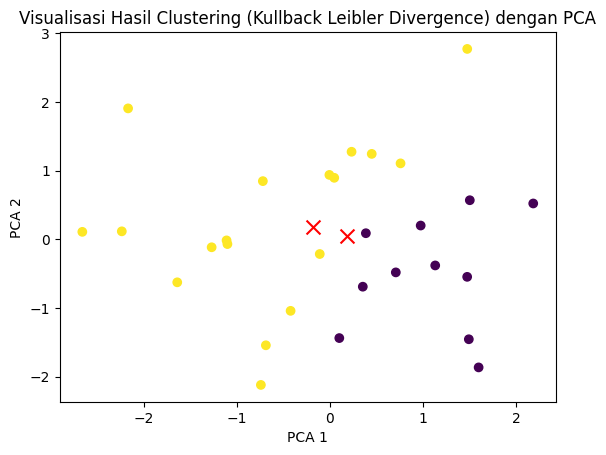

In [273]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_dkl)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Kullback Leibler Divergence) dengan PCA')

# tampilkan centroid
centroids_dkl = pca.transform(centroids_dkl)
plt.scatter(centroids_dkl[:, 0], centroids_dkl[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **Divergensi Jensen Shannon**

Sama seperti Divergensi Kullback Leibler, Jensen Shannon juga merupakan metrik yang menghitung kesamaaan/perbedaan berdasarkan probabilitas diskrit. Hanya saja, distribusinya adalah 1/2 dkl P|M dan 1/2 dkl Q|M.

In [274]:
# rumus jensen shannon divergence
def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (kullback_leibler_divergence(p, m) + kullback_leibler_divergence(q, m))

# fungsi kustom k-means dengan metric Kullback-Leibler Divergence
def custom_kmeans_jsd(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan Kullback-Leibler Divergence
        labels = np.array([
            np.argmin([jensen_shannon_divergence(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_jsd, centroids_jsd = custom_kmeans_jsd(distributions, n_clusters=2)


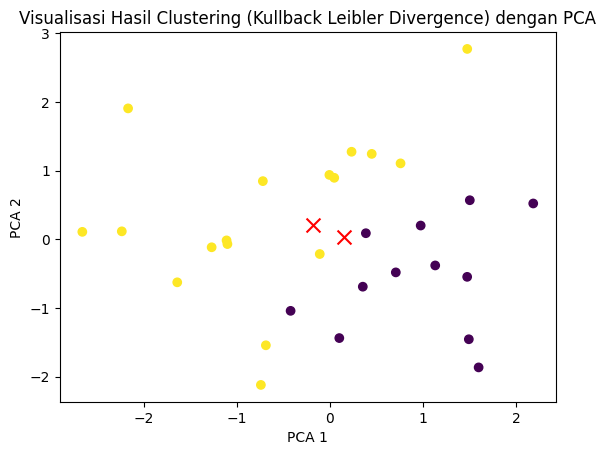

In [275]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_jsd)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Kullback Leibler Divergence) dengan PCA')

# tampilkan centroid
centroids_jsd = pca.transform(centroids_jsd)
plt.scatter(centroids_jsd[:, 0], centroids_jsd[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()